Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()

Load Dataset/Data Cleaning

In [113]:
df=pd.read_csv("Electric Vehicle Population.csv")

In [114]:
df.head()

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible


In [115]:
df.shape

(92676, 8)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92676 entries, 0 to 92675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    92676 non-null  object 
 1   Model Year               92676 non-null  int64  
 2   Make                     92676 non-null  object 
 3   Electric Vehicle Type    92676 non-null  object 
 4   Electric Range           92676 non-null  int64  
 5   Base MSRP                92676 non-null  int64  
 6   Legislative District     92676 non-null  float64
 7   CAFV Eligibility Simple  92676 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


In [117]:
# Null values
df.isnull().sum()

State                      0
Model Year                 0
Make                       0
Electric Vehicle Type      0
Electric Range             0
Base MSRP                  0
Legislative District       0
CAFV Eligibility Simple    0
dtype: int64

In [118]:
df.duplicated().sum()

81338

In [119]:
# Remove duplicate rows and keep the first occurrence
df=df.drop_duplicates(keep='first')

In [120]:
df.reset_index(drop=True, inplace=True)

In [121]:
df.shape

(11338, 8)

Exploratory Data Analysis

In [122]:
df['Model Year'].unique()

array([2020, 2024, 2018, 2012, 2014, 2017, 2016, 2023, 2019, 2022, 2015,
       2011, 2013, 2021, 2025, 2010, 2008, 2002, 2000, 1999, 2003],
      dtype=int64)

In [123]:
# Number of Electric Vehicle for each year
df.groupby('Model Year', as_index=False)['Electric Vehicle Type'].count()

,Model Year,Electric Vehicle Type
0,1999,2
1,2000,5
2,2002,2
3,2003,1
4,2008,15
5,2010,17
6,2011,94
7,2012,236
8,2013,344
9,2014,562


Text(0.5, 1.0, 'Electric Vehicle Type')

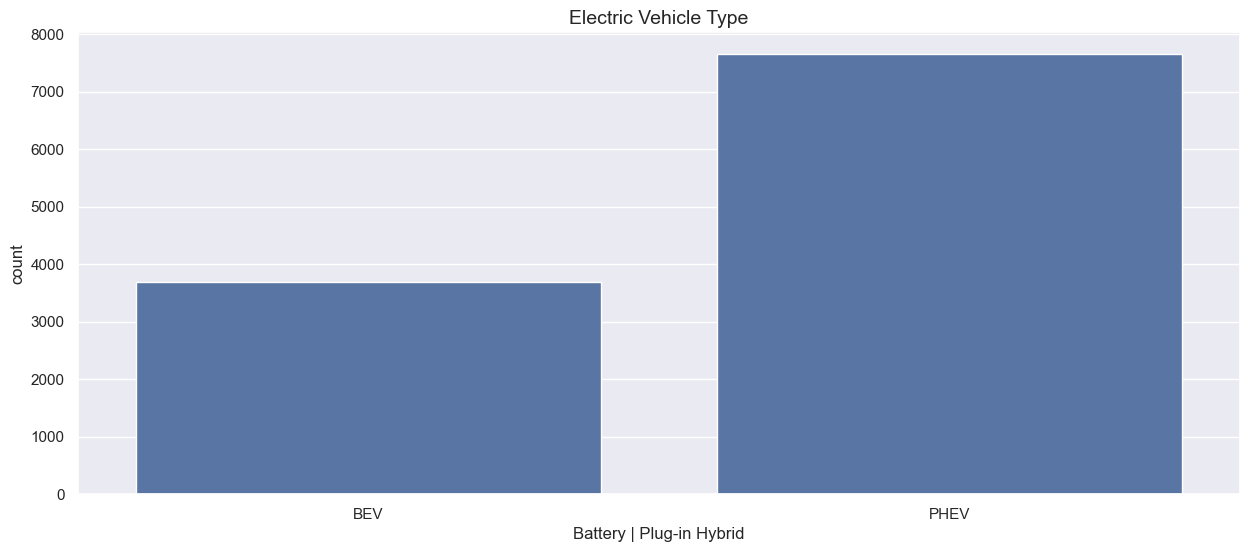

In [141]:
# Distribution of Electric Vehicle Type
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Electric Vehicle Type', data=df)
ax.set_xlabel("Battery | Plug-in Hybrid")
ax.set_title ("Electric Vehicle Type", fontsize=14)


Text(0.5, 0, '')

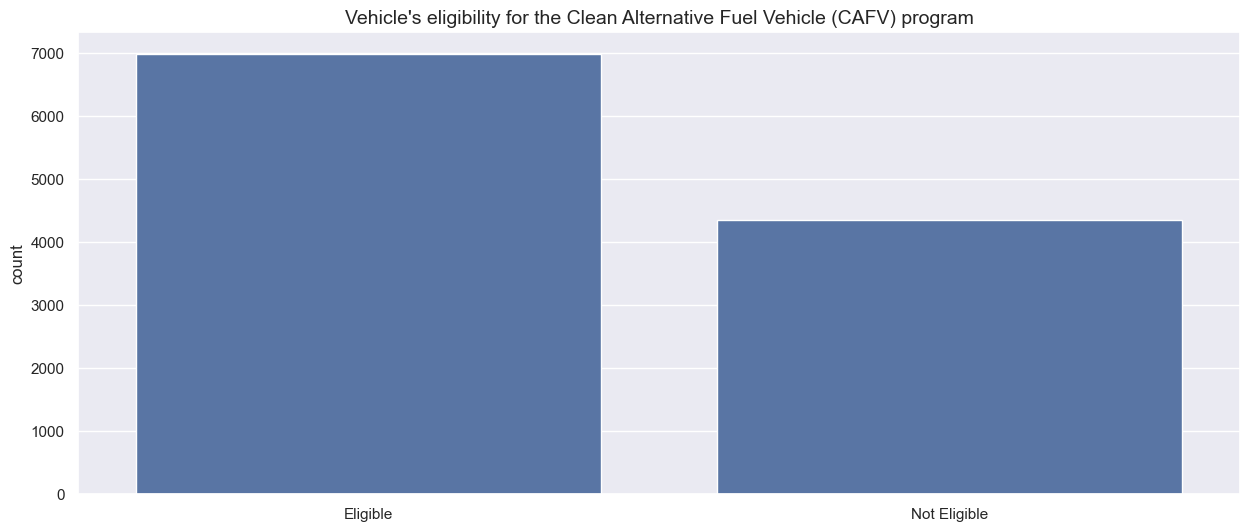

In [144]:
# Distribution of CAFV Eligibility
plt.figure(figsize=(15,6))
ax=sns.countplot(x='CAFV Eligibility Simple', data=df)
ax.set_title("Vehicle's eligibility for the Clean Alternative Fuel Vehicle (CAFV) program", fontsize=14)
ax.set_xlabel("")

In [126]:
# Number of Electric Vehicle Type for each State (we only have WA)
df.groupby('State', as_index=False)['Electric Vehicle Type'].count()

,State,Electric Vehicle Type
0,WA,11338


C:\Users\adani\AppData\Local\Temp\ipykernel_3268\3243262117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data=df, palette='tab20')


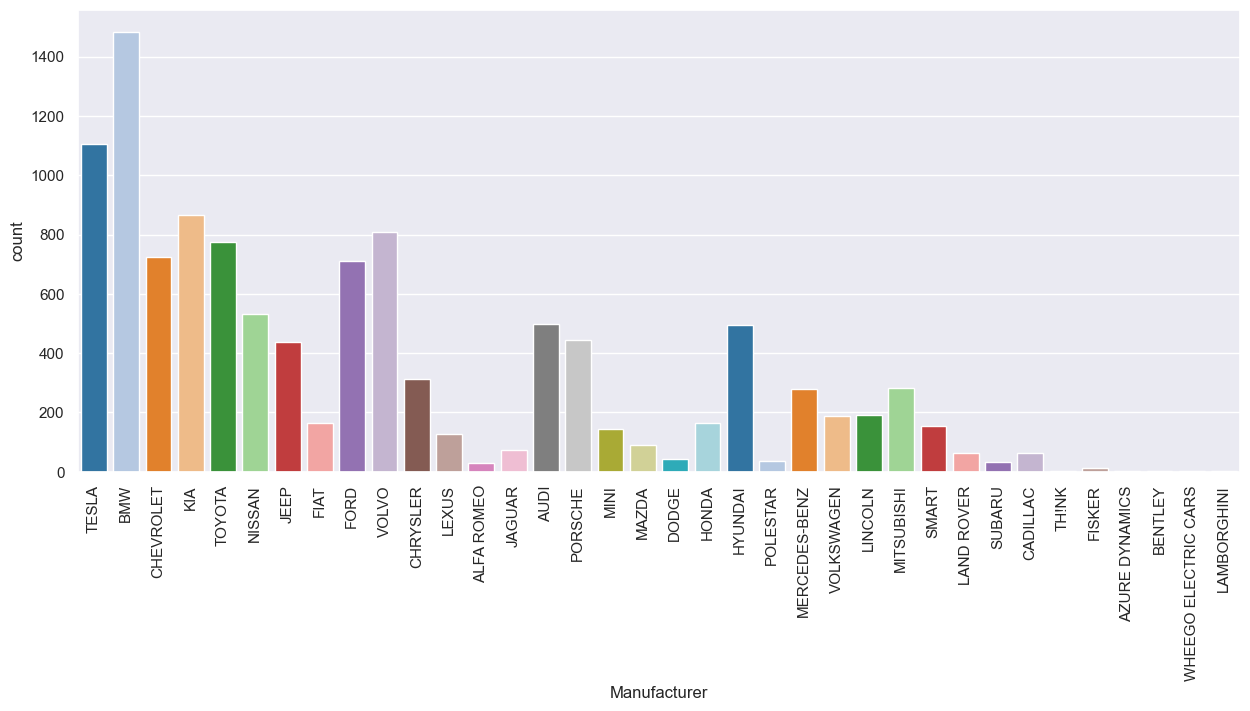

In [145]:
# Vehicle number per manufacturer
plt.figure(figsize=(15,6))
sns.countplot(x='Make', data=df, palette='tab20')
plt.xlabel("Manufacturer")
plt.xticks(rotation=90)
plt.show()

In [128]:
# 'Electric Range' descriptive statistics
df['Electric Range'].describe()

count    11338.000000
mean        74.988622
std         81.663606
min          6.000000
25%         22.000000
50%         35.000000
75%         87.000000
max        337.000000
Name: Electric Range, dtype: float64

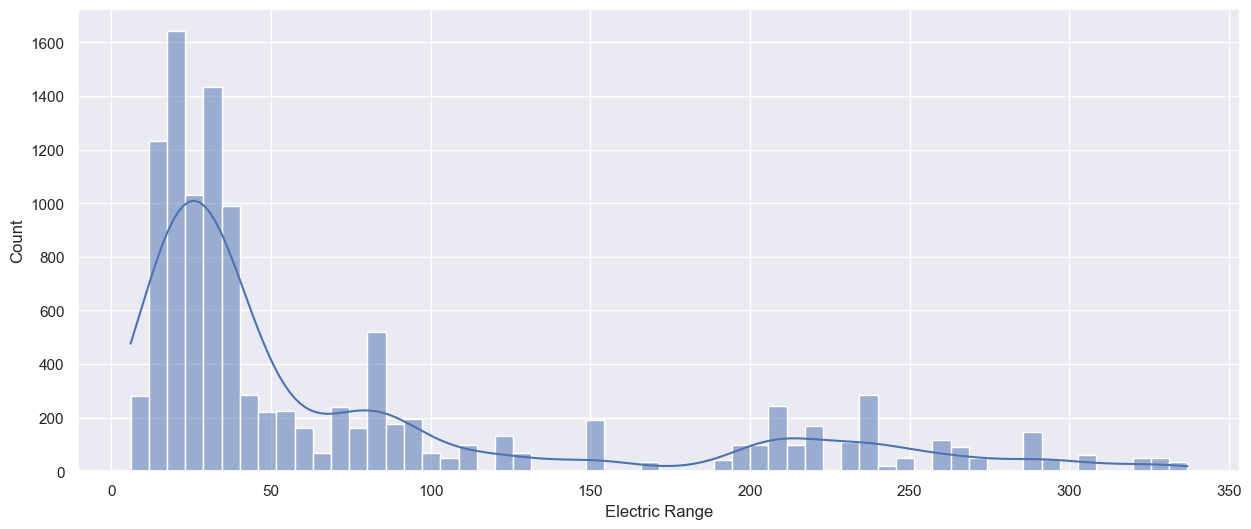

In [129]:
# Distribution of Electric Range
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Electric Range', kde=True)
plt.show()

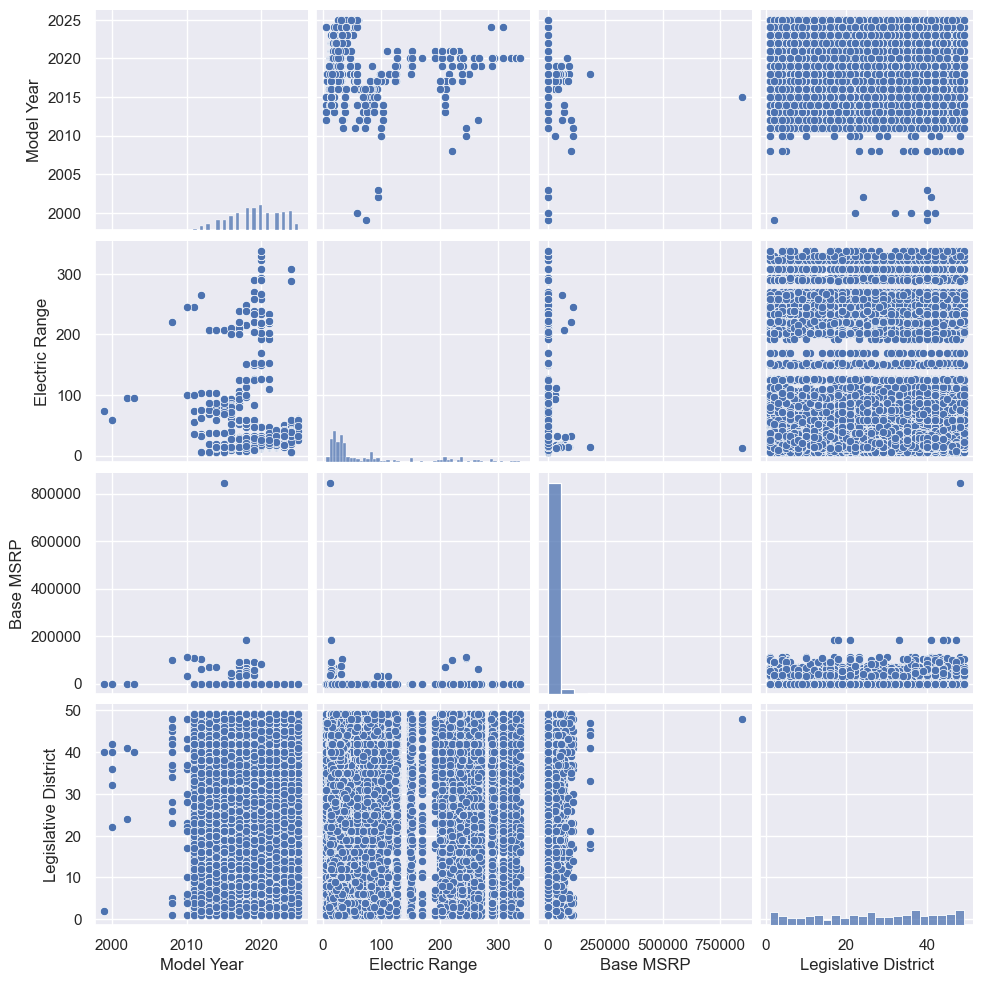

In [130]:
# Check the possible correlations between the variables 
sns.pairplot(df)

In [131]:
# Compute pairwise correlation of columns
df.corr(numeric_only=True)

,Model Year,Electric Range,Base MSRP,Legislative District
Model Year,1.000000,-0.162399,-0.194800,0.002339
Electric Range,-0.162399,1.000000,0.023939,-0.012992
Base MSRP,-0.194800,0.023939,1.000000,0.011998
Legislative District,0.002339,-0.012992,0.011998,1.000000


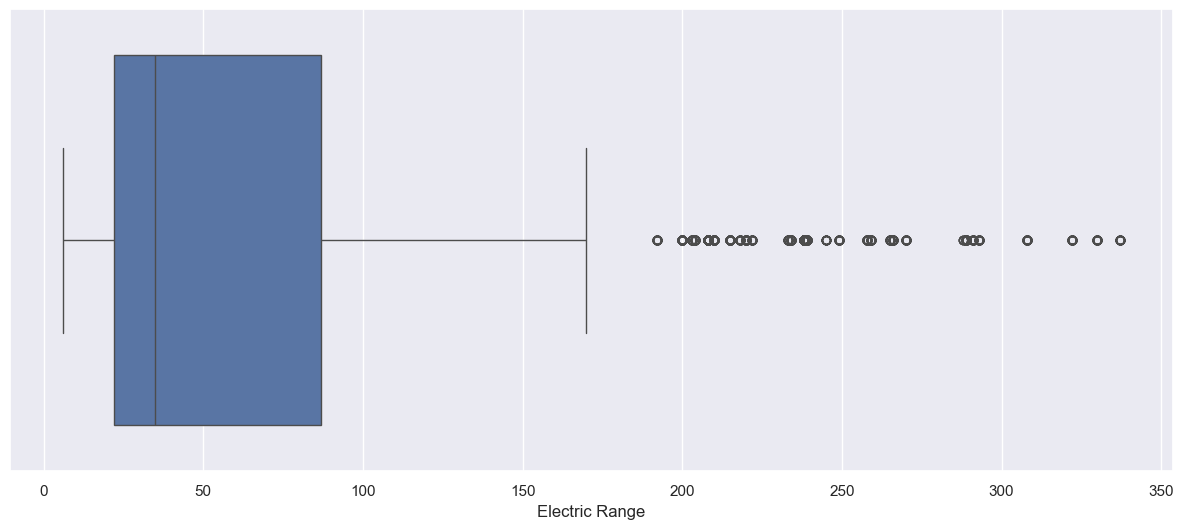

In [132]:
# Detailed distribution of Electric Range
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Electric Range')
plt.show()

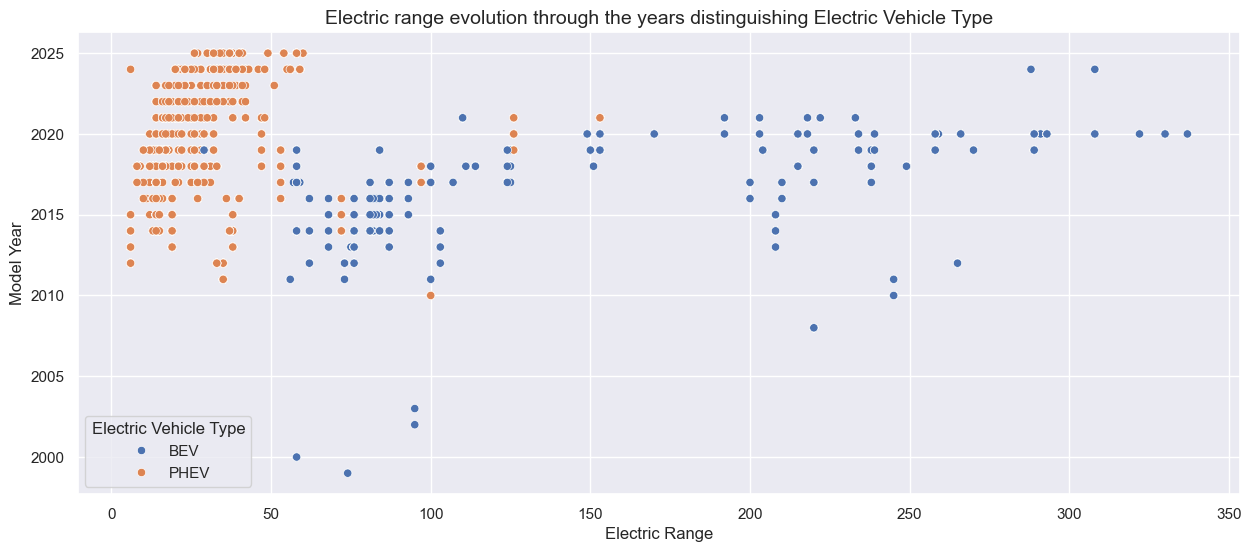

In [148]:
# Electric range evolution through the years distinguishing Electric Vehicle Type
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Electric Range', y='Model Year', hue='Electric Vehicle Type')
plt.title("Electric range evolution through the years distinguishing Electric Vehicle Type", fontsize=14)
plt.show()

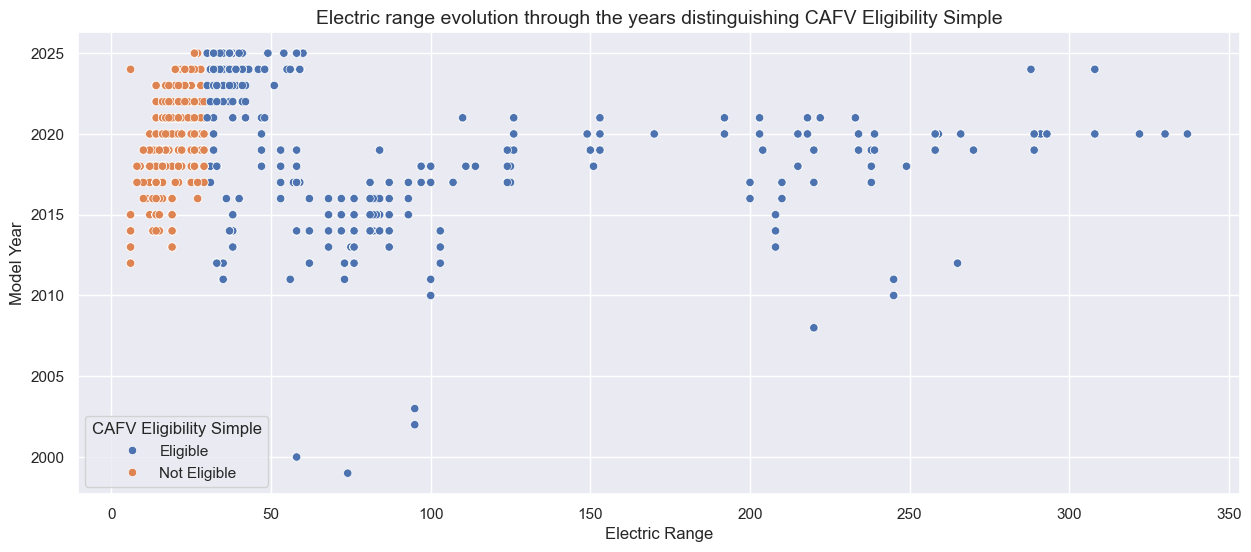

In [149]:
# Electric range evolution through the years distinguishing CAFV Eligibility Simple
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Electric Range', y='Model Year', hue='CAFV Eligibility Simple')
plt.title("Electric range evolution through the years distinguishing CAFV Eligibility Simple", fontsize=14)
plt.show()

In [135]:
# Manufacturer per year (we can see it in depth on Tableau) 
cnt=df.groupby(['Model Year', 'Make'], as_index=False).size()

In [136]:
cnt

,Model Year,Make,size
0,1999,FORD,2
1,2000,FORD,5
2,2002,TOYOTA,2
3,2003,TOYOTA,1
4,2008,TESLA,15
...,...,...,...
216,2025,LINCOLN,1
217,2025,MAZDA,40
218,2025,MERCEDES-BENZ,33
219,2025,MITSUBISHI,3


In [ ]:
#df.to_csv('Electric_Vehicle_Project_Clean.csv')